In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tqdm as tqdm

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os

디렉토리 안의 파일 접근 test

In [9]:
def print_files_in_dir(root_dir, prefix):
  files = os.listdir(root_dir) # root_dir의 모든 파일 출력
  print(files)
  for files in files:
    path = os.path.join(root_dir, file) # => 여기서 오류남
    print(prefix + path)

if __name__ == "__main__":
  root_dir = "/content/sample_data"
  print_files_in_dir(root_dir, "")

['anscombe.json', 'README.md', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv']


NameError: ignored

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train_dir = '/content/drive/MyDrive/images_crawling/train'
# test_dir='/content/drive/MyDrive/images_crawling/validation'

데이터셋 load

In [12]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/dataset/test.csv
/content/drive/MyDrive/dataset/alien_test/foggy_4.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_1.jpg
/content/drive/MyDrive/dataset/alien_test/Cloud_3.jpeg
/content/drive/MyDrive/dataset/alien_test/Cloud_4.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_9.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_6.jpg
/content/drive/MyDrive/dataset/alien_test/Cloud_2.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_2.jpg
/content/drive/MyDrive/dataset/alien_test/rain_1.jpg
/content/drive/MyDrive/dataset/alien_test/rain_3.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_10.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_3.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_7.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_8.jpg
/content/drive/MyDrive/dataset/alien_test/foggy_5.jpg
/content/drive/MyDrive/dataset/alien_test/Cloud_1.png
/content/drive/MyDrive/dataset/alien_test/sunrise_3.jpg
/content/drive/MyDrive/dataset/alien_tes

In [13]:
root_dir = '/content/drive/MyDrive/dataset'
os.listdir(root_dir)

['test.csv', 'alien_test', 'cloudy', 'shine', 'foggy', 'rainy', 'sunrise']

In [20]:
foggy = root_dir + '/foggy'
sunrise = root_dir + '/sunrise'
shine = root_dir + '/shine'
rainy = root_dir + '/rainy'
cloudy = root_dir + '/cloudy'
test = root_dir + '/alien_test'


In [21]:
print("Number of images in each directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of images in each directory:
Foggy: 300
Sunrise: 339
Shine: 250
Rainy: 292
Cloudy: 300


데이터 전처리

In [22]:
x= []
y= []
dataset = []

In [24]:
def create_dataset(dir, dir_name):
  for i in tqdm.tqdm(os.listdir(dir)): # 진행률 표시
    full_path = os.path.join(dir, i)

    try:
      img = cv2.imread(full_path)
      img = cv2.resize(img, (150, 150))

    except:
      continue

    x.append(img)
    y.append(dir_name)
  return x, y

In [25]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [01:21<00:00,  3.66it/s]


numpy를 이용해서 배열로 변환

In [26]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((1479, 150, 150, 3), (1479,))

seaborn으로 데이터분포 시각화

In [29]:
import seaborn as sns

In [54]:
print(plt.style.available) # style.use로 테마 바꾸기

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


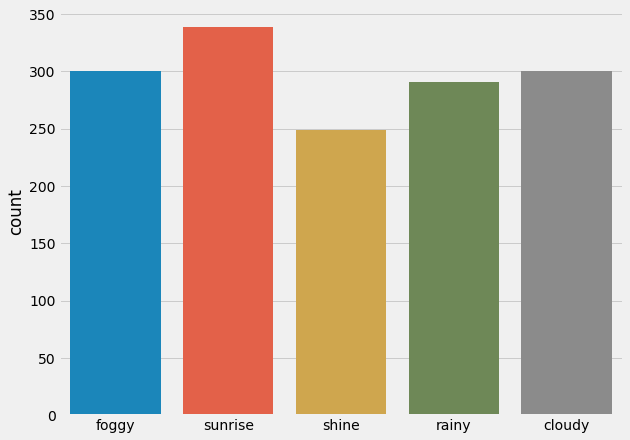

In [30]:
plt.figure(figsize = (9, 7))
plt.style.use("fivethirtyeight")
sns.countplot(y)
plt.show()

In [32]:
import random

샘플 이미지 출력 (test)

In [ ]:
fig = plt.figure(figsize= (12, 7))
for i in range(15):
  sample = random.choice(range(len(x)))
  image = x[sample]
  category = y[sample]
  plt.subplot(3, 5, i+1)
  plt.subplots_adjust(hspace=0.3)
  plt.imshow(image)
  plt.xlabel(category)

plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
# test_size= 0.2, random_state=42

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [41]:
img_size = 150

# rescale
x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0

# train_data reshape
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

# test_data reshape
x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [42]:
from sklearn.preprocessing import LabelBinarizer

In [43]:
lb = LabelBinarizer()

y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [44]:
y_train_lb.shape, y_test_lb.shape

((1183, 5), (296, 5))

모델 설계 및 디자인_ver2: VGG19 사용



In [45]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet", 
            include_top=False, # 최상단의 fully connected layer 포함 시킬지 여부
            input_shape=(img_size, img_size,3))

80150528/80134624 [==============================] - 1s 0us/step


In [46]:
for layer in vgg.layers:
  layer.trainable = False # 레이어 동결

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [48]:
# activation: softmax

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5, activation = "softmax"))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 40965     
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


optimizer, compile 정보 설정

In [51]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics="accuracy")

In [52]:
unique, counts = np.unique(y_train_lb, return_counts=True)
print(unique, counts)

[0 1] [4732 1183]


데이터 연결 및 학습

In [53]:
# batch_size: 32
# epochs: 15

batch_size=32
history= model.fit(x_train, y_train_lb, 
                   epochs=15, 
                   validation_data=(x_test,y_test_lb),
                   batch_size=batch_size,
                   verbose=1 # 학습 진행상황 보여지게 설정
                   )

Epoch 1/15
37/37 [==============================] - 349s 9s/step - loss: 0.9679 - accuracy: 0.6610 - val_loss: 0.5847 - val_accuracy: 0.8007
Epoch 2/15
37/37 [==============================] - 347s 9s/step - loss: 0.4429 - accuracy: 0.8732 - val_loss: 0.4727 - val_accuracy: 0.8345
Epoch 3/15
37/37 [==============================] - 347s 9s/step - loss: 0.3158 - accuracy: 0.9155 - val_loss: 0.3862 - val_accuracy: 0.9088
Epoch 4/15
37/37 [==============================] - 347s 9s/step - loss: 0.2492 - accuracy: 0.9451 - val_loss: 0.3746 - val_accuracy: 0.8716
Epoch 5/15
37/37 [==============================] - 347s 9s/step - loss: 0.2092 - accuracy: 0.9459 - val_loss: 0.3567 - val_accuracy: 0.8784
Epoch 6/15
37/37 [==============================] - 347s 9s/step - loss: 0.1737 - accuracy: 0.9645 - val_loss: 0.3194 - val_accuracy: 0.9122
Epoch 7/15
37/37 [==============================] - 347s 9s/step - loss: 0.1454 - accuracy: 0.9763 - val_loss: 0.3214 - val_accuracy: 0.9088
Epoch 8/15
37

test 데이터셋으로 모델 성능 평가

In [55]:
loss, accuracy = model.evaluate(x_test, y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10/10 [==============================] - 70s 7s/step - loss: 0.3031 - accuracy: 0.9088
Loss: 0.3031231760978699
Accuracy: 0.9087837934494019


In [ ]:
y_pred = model.predict_classes(x_test)
y_pred[:15]

savedmodel 저장

In [57]:
!mkdir -p saved_model
model.save('saved_model/image_sentimental_analysis_ver2')

INFO:tensorflow:Assets written to: saved_model/image_sentimental_analysis_ver2/assets


학습 곡선 시각화

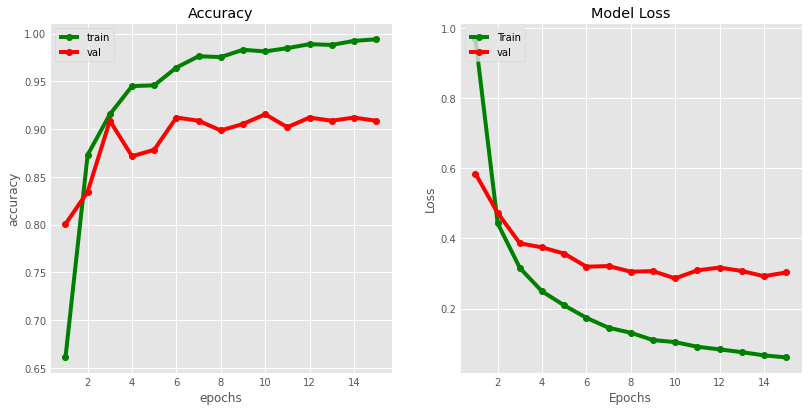

In [58]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12, 6))
epochs = range(1,16)

# accuracy 값
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], "go-")
plt.plot(epochs, history.history["val_accuracy"], "ro-")
plt.title("Accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend(["train", "val"], loc = "upper left")

# loss 값
plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend(["Train","val"],loc = "upper left")
plt.show()